
# Algoritmos basados en árboles de decisión
Los algoritmos basados en árboles de decisión también son de aprendizaje supervisado y se pueden usar para tareas de regresión o clasificación.

El nombre de esta familia se debe a que usan una estructura básica, los árboles precisamente, que con simples reglas de decisión aplicadas sobre los datos les permite generar predicciones.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE # recursive feature elimination
from sklearn.ensemble import ExtraTreesClassifier #decision trees 

from sklearn.model_selection import train_test_split


#leer datos
data = pd.read_csv('pid.100.csv')
dataset = data[3:]

print(pd.Series(dataset['pid']).value_counts(sort = True))

y = dataset['pid']# variable dependiente
x = dataset.drop(['pid'], axis=1) #  variable independiente


pid
 1      40637
 101    28306
 106     2317
-106     1019
 102      879
 40       630
 27       575
 49        54
-1         48
-40        10
-49         2
-27         1
Name: count, dtype: int64


In [14]:
#separar datos en entrenamiento y prueba

X_train, X_test, Y_train, Y_test = train_test_split(x, y ,test_size = 0.2, random_state = 1)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(59582, 10) (14896, 10) (59582,) (14896,)


In [15]:

# Importamos las librerias para la creacion del modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir el clasificador y los valores de los hiperparámetros a probar
clf = DecisionTreeClassifier(random_state=42)
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5]}

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación de validación cruzada:")
print(grid_search.best_score_)

/home/isadoji/Storage/Software/miniconda3/envs/mspf2023/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Mejores hiperparámetros encontrados:
{'criterion': 'gini', 'max_depth': 5}
Mejor puntuación de validación cruzada:
0.9200597728880368


In [16]:
# Modelo decision tree con parametros optimizados
best_clf = grid_search.best_estimator_

In [17]:
# Predecimos Y
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)

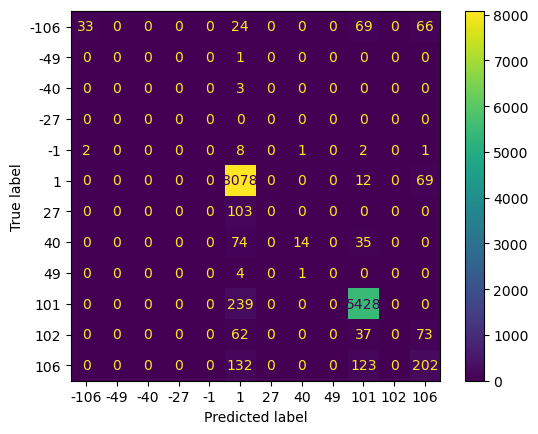

In [18]:
# Graficamos matriz de confusion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(Y_test,y_test_pred,labels=best_clf.classes_)
ConfusionMatrixDisplay(cm, display_labels=best_clf.classes_).plot()

In [19]:
# Calculo de las predicciones en Train y test
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
print('El accuracy en train es:',accuracy_score(Y_train,y_train_pred))
print('El accuracy en test es:', accuracy_score(Y_test,y_test_pred))

El accuracy en train es: 0.9205464737672452
El accuracy en test es: 0.9234022556390977


In [21]:


feature_scores= pd.DataFrame(pd.Series(grid_search.best_estimator_.feature_importances_, index=pd.DataFrame(X_train).columns).sort_values(ascending=False)).T


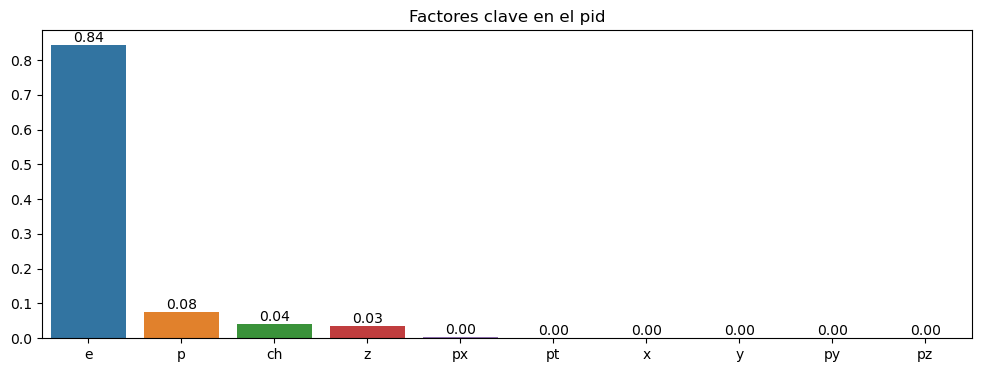

In [22]:
plt.figure(figsize=(12,4))
sns.barplot(data=feature_scores)

for index, value in enumerate(feature_scores.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')


plt.title("Factores clave en el pid")
plt.show()

[Text(0.4732142857142857, 0.9166666666666666, 'x[3] <= 1.154\ngini = 0.557\nsamples = 59582\nvalue = [827, 1, 7, 1, 34, 32478, 472, 507, 49, 22639, 707\n1860]'),
 Text(0.23214285714285715, 0.75, 'x[3] <= 0.601\ngini = 0.239\nsamples = 22458\nvalue = [577, 0, 0, 0, 7, 766, 8, 0, 0, 19533, 429, 1138]'),
 Text(0.13392857142857142, 0.5833333333333334, 'x[3] <= 0.512\ngini = 0.039\nsamples = 13716\nvalue = [79, 0, 0, 0, 0, 0, 0, 0, 0, 13448, 27, 162]'),
 Text(0.07142857142857142, 0.4166666666666667, 'x[3] <= 0.5\ngini = 0.002\nsamples = 11510\nvalue = [2, 0, 0, 0, 0, 0, 0, 0, 0, 11498, 0, 10]'),
 Text(0.03571428571428571, 0.25, 'x[3] <= 0.498\ngini = 0.0\nsamples = 11213\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 11212, 0, 1]'),
 Text(0.017857142857142856, 0.08333333333333333, 'gini = 0.0\nsamples = 11147\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 11147, 0, 0]'),
 Text(0.05357142857142857, 0.08333333333333333, 'gini = 0.03\nsamples = 66\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 65, 0, 1]'),
 Text(0.10714285

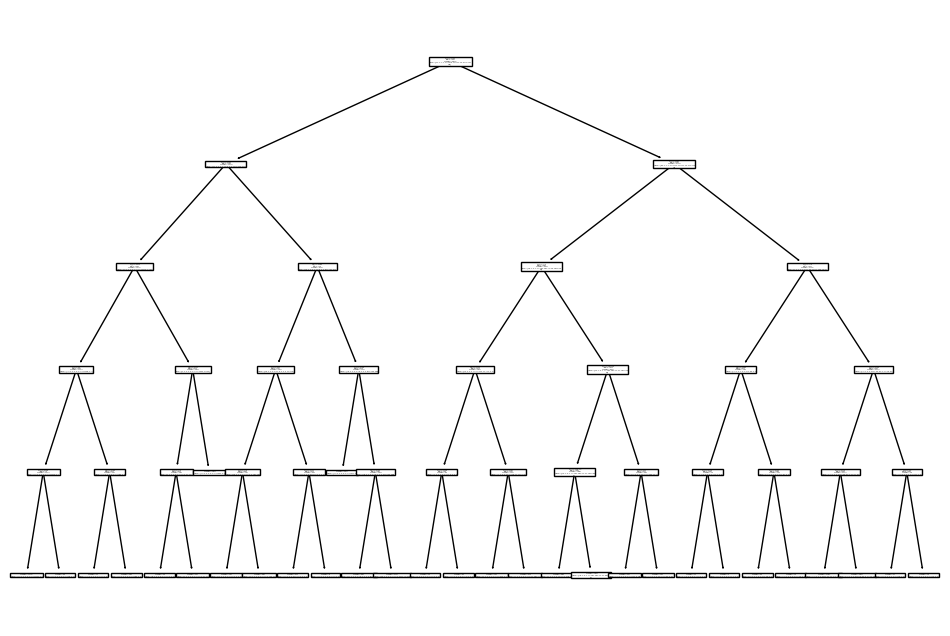

In [23]:
plt.figure(figsize = (12,8))
from sklearn import tree

tree.plot_tree(best_clf.fit(X_train, Y_train))

https://bookdown.org/keilor_rojas/CienciaDatos/introducci%C3%B3n-a-ciencia-de-datos-en-python.html